---
title: Visualizing Data
bibliography: references.bib
format:
  html:
    toc: true
    toc-expand: 2
    toc-title: CONTENTS
---

This lesson introduces three of the most popular Python libraries for data visualization: **Pandas**, **Plotly**, and **Seaborn** Each library offers unique capabilities for analyzing and presenting data. You will gain hands-on experience comparing these tools while developing skills to create insightful visualizations like bar charts, line charts, and scatterplots.

## Data skills | concepts
- Pandas
- Plotly
- Seaborn

## Learning objectives
1. Compare and contrast **Pandas**, **Plotly**, and **Seaborn** for visualizing data in Python.
2. **Formulate** a data-driven question and **outline** the steps needed to filter, aggregate, and visualize data effectively.
3. **Create** and **customize bar charts** to compare categorical data.
4. **Illustrate** trends and patterns over time using **line charts**.
5. **Explore** relationships between two variables through **scatterplots**.

This tutorial is designed to support __[workshops](https://library.osu.edu/events?combine=&tid=All&field_location_code_value=10&sort_bef_combine=field_end_date_value_ASC)__ hosted by The Ohio State University Libraries Research Commons. It assumes you already have a basic understanding of Python, including how to iterate through lists and dictionaries to extract data using a for loop. To learn basic Python concepts visit the [Python - Mastering the Basics](python_basics.ipynb) tutorial.

# PANDAS
__[Pandas](https://pandas.pydata.org/docs/reference/index.html)__ is powerful Python library designed to help you organize, explore and analyze in tables using Python. Pandas can be used to generate summary statistics and build __[basic visualizations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)__.

Pandas integrates with Matplotlib to generate simple plots using the `.plot()` method. The `kind =` parameter specifies the type of chart to create:

| **kind =** | **Chart Type                                 |
|:-------------------|:-----------------------------------|
| `line`              | line chart (default)                |
| `bar` or `barh`     | vertical or horizontal bar chart    |
| `hist`              | histogram                           |
| `box`               | boxplot                             |
| `kde` or `density`  | Kernel Denstity Estimation plot     |
| `area`              | area plot                           |
| `scatter`           | scatterplot                         |
| `hex`               | hexagonal bin plots                 |
| `pie`               | pie charts                          |


## 📊 Bar Chart
Let's build a bar chart that highlights the **average U.S. peak chart positions** for albums by __[2025 Rock & Roll Hall of Fame inductees](https://en.wikipedia.org/wiki/List_of_Rock_and_Roll_Hall_of_Fame_inductees)__ to explore visualizing data with Pandas.[^1]

[^1]: Visit the Websites and APIs. __[Lesson 3. Wikipedia](https://osu-libraries-research-services.github.io/data_visualization/wikipedia)__ tutorial to learn how to extract tables from HTML using pandas.read_html.See the __[Websites and APIs. Lesson 4. iCite](https://osu-libraries-research-services.github.io/data_visualization/icite)__ tutorial and __[Websites and APIs. Lesson 7. Crossref](https://osu-libraries-research-services.github.io/data_visualization/crossref)__ tutorial to learn how to use APIs to gather data.

The syntax for building a __[Basic Pandas Chart](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)__ is:

`DataFrame.plot(*args, **kwargs)`

### Step 1. Import libraries

Pandas works alongside matplotlib libraries to visualize data. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 


### Step 2. Read in files 
We’ll use the `rock_n_roll_performers.csv` table from the Wikipedia page on __[Rock and Roll Hall of Fame inductees](https://en.wikipedia.org/wiki/List_of_Rock_and_Roll_Hall_of_Fame_inductees)__ to explore plotting with Pandas. The *Performers* category honors recording artists and bands who have had a significant and lasting impact on the development and legacy of rock and roll. We'll also enhance our analysis by linking this dataset with `rock_n_roll_studio_albums.csv`  which contains studio album information of many of the inductees.

#### .read_csv()

In [5]:
performers=pd.read_csv('data/rock_n_roll_performers.csv', encoding="utf-8")

# A UnicodeDecodeError occurs after asking Pandas to read in rock_n_roll_studio_albums. Co-pilot suggests trying a difference encoding, like latin1
studio_albums=pd.read_csv('data/rock_n_roll_studio_albums.csv', encoding='latin1')

### Step 2. Merge datasets
After loading the **performers** and **studio_albums** tables using `pd.read_csv`, we can inspect the column headers using `.columns`.  


In [6]:
performers.columns

Index(['index', 'year', 'image', 'name', 'inducted_members',
       'prior_nominations', 'induction_presenter', 'artist', 'image_url',
       'artist_url'],
      dtype='object')

In [7]:
studio_albums.columns

Index(['index', 'album_title', 'artist', 'certification_aria',
       'certification_aria_status', 'certification_aria_x',
       'certification_bmvi', 'certification_bmvi_status',
       'certification_bmvi_x', 'certification_bpi', 'certification_bpi_status',
       'certification_bpi_x', 'certification_mc', 'certification_mc_status',
       'certification_mc_x', 'certification_riaa', 'certification_riaa_status',
       'certification_riaa_x', 'certification_snep',
       'certification_snep_status', 'certification_snep_x', 'day',
       'format_4_track', 'format_8_track', 'format_blueray', 'format_box_set',
       'format_cassette', 'format_cd', 'format_digital_compact_cassette',
       'format_digital_download', 'format_dvd', 'format_lp',
       'format_mini_disc', 'format_picture_disc', 'format_reel',
       'format_streaming', 'format_vhs', 'month', 'peakAUS', 'peakAUT',
       'peakCAN', 'peakFRA', 'peakGER', 'peakIRE', 'peakITA', 'peakJPN',
       'peakNLD', 'peakNOR', 'peakNZ',

Both datasets share the columns **artist** and **year**, which could be used for merging. However, to avoid confusion after joining, we'll first rename the header **year** in the **performers** dataset to **year_inducted**. 

#### .rename()

In [8]:
performers=performers.rename(columns={'year':'year_inducted'})  
performers.columns

Index(['index', 'year_inducted', 'image', 'name', 'inducted_members',
       'prior_nominations', 'induction_presenter', 'artist', 'image_url',
       'artist_url'],
      dtype='object')

Then, we'll merge the two datasets using the shared **artist** column.

In [9]:
performers_albums=pd.merge(performers, studio_albums, on='artist')
performers_albums.columns

Index(['index_x', 'year_inducted', 'image', 'name', 'inducted_members',
       'prior_nominations', 'induction_presenter', 'artist', 'image_url',
       'artist_url', 'index_y', 'album_title', 'certification_aria',
       'certification_aria_status', 'certification_aria_x',
       'certification_bmvi', 'certification_bmvi_status',
       'certification_bmvi_x', 'certification_bpi', 'certification_bpi_status',
       'certification_bpi_x', 'certification_mc', 'certification_mc_status',
       'certification_mc_x', 'certification_riaa', 'certification_riaa_status',
       'certification_riaa_x', 'certification_snep',
       'certification_snep_status', 'certification_snep_x', 'day',
       'format_4_track', 'format_8_track', 'format_blueray', 'format_box_set',
       'format_cassette', 'format_cd', 'format_digital_compact_cassette',
       'format_digital_download', 'format_dvd', 'format_lp',
       'format_mini_disc', 'format_picture_disc', 'format_reel',
       'format_streaming', 'for

### Step 3. Create and apply filters
Now that we’ve merged the inductee and album datasets, we can begin filtering the data to focus on specific trends or groups.

Before applying any filters, it’s important to confirm the data type of the **year_inducted** column in the **performers_albums** DataFrame. This ensures we can perform numerical comparisons or sorting without errors.

#### .dtypes

In [10]:
performers_albums['year_inducted'].dtypes


dtype('int64')

We can create and apply **filter** to isolate the **2025 inductees** using the **year_inducted** field.

#### filter_variable=df['column']==value

In [11]:
#First create the filter
_2025_inductees= performers_albums['year_inducted']==2025 

#### filtered_df=df[filter_variable]

In [12]:
#Then apply the filter
performers_albums_filtered=performers_albums[_2025_inductees]
performers_albums_filtered

,index_x,year_inducted,image,name,inducted_members,prior_nominations,induction_presenter,artist,image_url,artist_url,...,peakSPA,peakSWE,peakSWI,peakUK,peakUS,peakUS Country,peakUS R&B,Record label,Release date,year
4770,264,2025,NaN,Bad Company[193],"Boz Burrell, Simon Kirke, Mick Ralphs, and Pau...",First nomination,NaN,Bad Company,/wiki/File:Bad_Company_-_1976.jpg,/wiki/Bad_Company,...,NaN,NaN,NaN,3.0,1.0,NaN,NaN,"Island, Swan Song",5/24/1974,1974
4771,264,2025,NaN,Bad Company[193],"Boz Burrell, Simon Kirke, Mick Ralphs, and Pau...",First nomination,NaN,Bad Company,/wiki/File:Bad_Company_-_1976.jpg,/wiki/Bad_Company,...,NaN,NaN,NaN,3.0,3.0,NaN,NaN,"Island, Swan Song",3/28/1975,1975
4772,264,2025,NaN,Bad Company[193],"Boz Burrell, Simon Kirke, Mick Ralphs, and Pau...",First nomination,NaN,Bad Company,/wiki/File:Bad_Company_-_1976.jpg,/wiki/Bad_Company,...,NaN,23.0,NaN,4.0,5.0,NaN,NaN,"Island, Swan Song",1/30/1976,1976
4773,264,2025,NaN,Bad Company[193],"Boz Burrell, Simon Kirke, Mick Ralphs, and Pau...",First nomination,NaN,Bad Company,/wiki/File:Bad_Company_-_1976.jpg,/wiki/Bad_Company,...,NaN,32.0,NaN,17.0,15.0,NaN,NaN,"Island, Swan Song",3/3/1977,1977
4774,264,2025,NaN,Bad Company[193],"Boz Burrell, Simon Kirke, Mick Ralphs, and Pau...",First nomination,NaN,Bad Company,/wiki/File:Bad_Company_-_1976.jpg,/wiki/Bad_Company,...,NaN,9.0,NaN,10.0,3.0,NaN,NaN,Swan Song,3/7/1979,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,270,2025,NaN,The White Stripes[193],Jack White and Meg White.[197][198],1 (2023),NaN,The White Stripes,"/wiki/File:Jack_%26_Meg,_The_White_Stripes.jpg",/wiki/The_White_Stripes,...,NaN,NaN,NaN,137.0,NaN,NaN,NaN,Sympathy for the Record Industry,6/20/2000,2000
4847,270,2025,NaN,The White Stripes[193],Jack White and Meg White.[197][198],1 (2023),NaN,The White Stripes,"/wiki/File:Jack_%26_Meg,_The_White_Stripes.jpg",/wiki/The_White_Stripes,...,NaN,53.0,NaN,55.0,61.0,NaN,NaN,"Sympathy for the Record Industry, Third Man Re...",7/3/2001,2001
4848,270,2025,NaN,The White Stripes[193],Jack White and Meg White.[197][198],1 (2023),NaN,The White Stripes,"/wiki/File:Jack_%26_Meg,_The_White_Stripes.jpg",/wiki/The_White_Stripes,...,NaN,7.0,NaN,1.0,6.0,NaN,NaN,V2,4/1/2003,2003
4849,270,2025,NaN,The White Stripes[193],Jack White and Meg White.[197][198],1 (2023),NaN,The White Stripes,"/wiki/File:Jack_%26_Meg,_The_White_Stripes.jpg",/wiki/The_White_Stripes,...,NaN,8.0,NaN,3.0,3.0,NaN,NaN,V2,6/7/2005,2005


### Step 4. Aggregate data

Pandas supports a variety of __[basic summary statistics](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)__
through build-in methods:

| **Method** | **Description**                                    |
|:--------------:|:-----------------------------------:|
| `.count()`     | number of observations    |
| `.sum()`       | histogram                           |
| `.mean()`      | boxplot                             |
| `.medium()`    | density plots                       |
| `.min()`       | area plots                          |
| `.max()`       | scatterplots                        |
| `mode()`       | hexagonal bin plots                 |
| `std()`        | pie charts                          |


#### .groupby()
To calculate statistics grouped by category—such as average chart positions by artist or year—we use the __[.groupby()](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#aggregating-statistics-grouped-by-category)__ method. This allows us to aggregate data based on one or more columns before applying summary functions.


In [13]:
performers_albums_filtered.groupby('artist')['peakUS'].mean()


artist
Bad Company          41.000000
Chubby Checker       57.333333
Cyndi Lauper         59.100000
Joe Cocker           62.571429
Outkast               4.833333
Soundgarden          31.000000
The White Stripes    18.000000
Name: peakUS, dtype: float64

### Step 5. Plot
The last step to build our bar chart is to add the `.plot(*args, **kwargs)` method with relevant arguments and keyword arguments. 

First use the `.sort_values(ascending=False)` method first to sort the bars in descending order. Then `.plot` with the keyword arguments:

- kind = 'bar'
- xlabel = '' (removes the redundant label on the x-axis)
- title = 'Peak US Chart Position: \n 2025 Rock N Roll Hall of Fame Inductees'  (\n = newline)



<Axes: title={'center': 'Average Peak US Chart Position: \n 2025 Rock N Roll Hall of Fame Inductees'}>

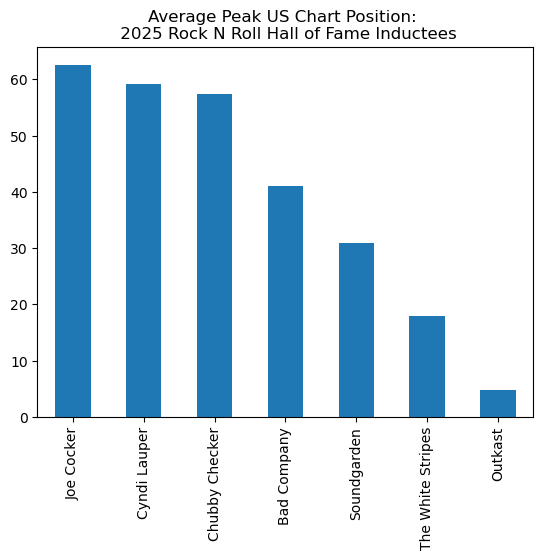

In [14]:
performers_albums_filtered.groupby('artist')['peakUS'].mean().sort_values(ascending=False).plot(kind='bar', xlabel='', title='Average Peak US Chart Position: \n 2025 Rock N Roll Hall of Fame Inductees')

## 📈 Line chart

Line charts reveal trends over time and at minimum require a **date field** and a **measure**. To create a line chart with Pandas, set the `kind =` parameter to `line`.

<div class="accordion" id="accordionExercise1">

  <div class="accordion-item"><h2 class="accordion-header" id="ex1-headingOne"><button class="accordion-button fs-3" type="button" data-bs-toggle="collapse" data-bs-target="#ex1-collapseOne" aria-expanded="true" aria-controls="ex1-collapseOne"><img src="images/guidepost_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Exercise 1: Pandas Line Chart</button></h2><div id="ex1-collapseOne" class="accordion-collapse collapse show fs-4" aria-labelledby="ex1-headingOne" data-bs-parent="#accordionExercise1"> <div class="accordion-body fs-4">Create a line chart that shows the total number of albums released each year by all artists in the `performers_albums` dataset.<ol><li>Identify relevant columns and data types</li><li>Aggregate data and plot</li></ol></div></div>
  </div>
</div>

### Step 1. Identify relevant columns and data types

Before creating a chart, the first step is to identify which columns are needed for the visualization. Once those columns are selected, we’ll check their data types to ensure they are suitable for analysis and plotting.


In [ ]:
performers_albums.columns

In [ ]:
performers_albums['Release date'].dtypes

In Pandas, **dtype('O')** stands for **object** data type. This is a general-purpose type used when a column contains:

- Strings (most common)
- Mixed types (e.g., numbers and text)
- Python objects (less common)

So if you see **dtype('O')** for a column, it usually means that column contains text or string values.

To convert **Release date** to year

In [ ]:
performers_albums['Release year']=performers_albums['Release date'].dt.year
performers_albums['Release year']

### Step 2. Aggregate data and plot
Group the album titles by **Release year** and then count **album_title** and set **.plot(kind='line')**.



In [ ]:
performers_albums.groupby('Release year')['album_title'].count().plot(kind='line', xlabel='', title='Line Chart')

## ░ Scatterplot

Scatterplots are useful for exploring relationships between two or more numerical variables. In Pandas, you can create a scatterplot using the `.plot()` method by specifying the **x** and **y** keyword arguments.

<div class="accordion" id="accordionExercise2">

  <div class="accordion-item"><h2 class="accordion-header" id="ex2-headingOne"><button class="accordion-button fs-3" type="button" data-bs-toggle="collapse" data-bs-target="#ex2-collapseOne" aria-expanded="true" aria-controls="ex2-collapseOne"><img src="images/guidepost_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Exercise 2: Pandas Scatterplot</button></h2><div id="ex2-collapseOne" class="accordion-collapse collapse show fs-4" aria-labelledby="ex2-headingOne" data-bs-parent="#accordionExercise2"><div class="accordion-body fs-4"><p>Use the Pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter">scatterplot</a> documentation to create a scatterplot that visualizes the relationship between the Peak US and Peak UK chart positions for albums released by your favorite artist inducted into the Rock and Roll Hall of Fame.</p><p><strong>BONUS:</strong> reverse the `x` and `y` axis.</p></div></div>
  </div>

  <div class="accordion-item"><h2 class="accordion-header" id="ex2-headingTwo"><button class="accordion-button fs-3 collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#ex2-collapseTwo" aria-expanded="false" aria-controls="ex2-collapseTwo"><img src="images/magnifying_glass_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Solution:</button></h2><div id="ex2-collapseTwo" class="accordion-collapse collapse" aria-labelledby="ex2-headingTwo" data-bs-parent="#accordionExercise2"> <div class="accordion-body"> 

```python
carmen_ohio=open('carmen_ohio.txt', mode='r', encoding='utf-8').read()

# first 250 characters
#Step 1. Create and apply a filter for your favorite artist
favorite_artist=performers_albums['artist']=='Kate Bush'
kate_bush=performers_albums[favorite_artist]

#Step 2. Plot the x and y axis
kate_bush.plot.scatter(x='peakUS',y='peakUK')
#BONUS
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
```
  </div>
  </div>
  </div>

</div>

# PLOTLY

The __[Plotly Open Source Graphing Library for Python](https://plotly.com/python/)__ is a robust and versatile Python library that offers over 40 types of interactive data visualizations—from basic **bar** and **bubble charts** to advanced **3D scatter** and **3D surface** plots. Plotly charts are fully interactive, enabling users to zoom, pan, hover for tooltips, and export visuals directly from the browser. 

Before using **Plotly**, be sure to follow the installation instructions provided in the official guide: __[Getting Started with Plotly in Python](https://plotly.com/python/getting-started/)__

Let's use plotly to build a **bar**, **line**, and **scatterplot** using the **performers_albums** DataFrame.

## 📊 Bar Chart

Build a Bar Chart showing the maximum U.S. peak chart position for any album released by __[2025 Rock & Roll Hall of Fame inductees](https://en.wikipedia.org/wiki/List_of_Rock_and_Roll_Hall_of_Fame_inductees)__.

In [ ]:
import plotly.io as pio
pio.renderers.default="notebook" # This statement is needed to display Plotly in html

#We already have a filtered DataFrame for the 2025 inductees. Since the highest chart position is 1, we need to tell Pandas to find the minimum peakUS chart position for each artist.
agg_performers_albums_filtered=performers_albums_filtered.groupby('artist', as_index=False)['peakUS'].min()

#Now we build our bar chart
fig=pio.bar(agg_performers_albums_filtered, x='artist', y='peakUS', title="Peak US Chart Position: 2025 Rock n Roll Hall of Fame Inductees", color='artist')
fig.show()



![](images/plotly_bar_chart.png "Image of Plotly Bar Chart. Jupyter notebooks do not consistently render plotly in Quarto websites")

## 📈 Line chart

Create a line chart that shows the total number of albums released each year by all artists in the `performers_albums` dataset.


In [ ]:
#We already converted 'Release date' to year in the code above. Now we tell Pandas to count the number of occurrences of each 'Year' using the .size() method

agg_for_line_performers_albums=performers_albums.groupby(['Release year'], as_index=False).size()

#Build the chart
fig2=pio.line(agg_for_line_performers_albums, x='Release year', y='size', title="Line Chart", markers=False)
fig2.show()


![](images/plotly_line_chart.png "Image of Plotly Line Chart. Jupyter notebooks do not consistently render plotly in Quarto websites")

## ▒ Scatterplot

Create a scatterplot that visualizes the relationship between the Peak US and Peak UK chart positions for albums released by your favorite artist inducted into the Rock and Roll Hall of Fame.

In [ ]:
#We already filtered the DataFrame for our favorite artist. Use this DataFrame to build the chart.
fig3=pio.scatter(kate_bush, x='peakUS', y='peakUK', color='album_title', title="Kate Bush Albums: Peak US vs. UK Chart Positions")

fig3.show()

![](images/plotly_scatterplot.png "Image of Plotly Scatterplot. Jupyter notebooks do not consistently render plotly in Quarto websites")

# SEABORN
![](images/seaborn_logo.png "Decorative") Built on top of **Matplotlib** and seamlessly integrated with **Pandas**, the __[Seaborn](https://seaborn.pydata.org/)__ library enhances the visual appeal of Python charts with minimal effort. Featuring built-in themes, concise syntax, and a rich gallery of customizable examples, Seaborn helps you create polisthed, publication-quality visualizations quickly and effectively.

## 📊 Bar Chart
Build a __[Bar Chart](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)__ showing the maximum U.S. peak chart position for any album released by __[2025 Rock & Roll Hall of Fame inductees](https://en.wikipedia.org/wiki/List_of_Rock_and_Roll_Hall_of_Fame_inductees)__.

In [ ]:
# INSERT CODE HERE
import seaborn as sns

#Create bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='artist', y='peakUS', data=agg_performers_albums_filtered)

# Add title and labels
plt.title("Peak US Chart Position \n 2025 Rock n Roll Hall of Fame Inductees")
plt.xlabel("")
plt.ylabel("Peak US chart position")

## 📈 Line chart

Create a line chart that shows the total number of albums released each year by all artists in the `performers_albums` dataset.

<div class="accordion" id="accordionExercise3">

  <div class="accordion-item"><h2 class="accordion-header" id="ex3-headingOne"><button class="accordion-button fs-3" type="button" data-bs-toggle="collapse" data-bs-target="#ex3-collapseOne" aria-expanded="true" aria-controls="ex3-collapseOne"><img src="images/guidepost_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Exercise 3: Seaborn Line Chart</button></h2><div id="ex3-collapseOne" class="accordion-collapse collapse show fs-4" aria-labelledby="ex3-headingOne" data-bs-parent="#accordionExercise3"><div class="accordion-body fs-4"><p>Using the Seaborn library's <a href="https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots">Emphasizing continuity with line plots</a> tutorial with the <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot">seaborn.lineplot</a> API documentation, create a line chart that shows the total number of albums released each year by all artists in the `performers_albums` dataset.</p><p>Format the chart to:</p><ul><li>Remove gridlines and borders</li><li>Adjust the x and y axis labels</li><li>Name the chart </li></ul></div></div>
  </div>

  <div class="accordion-item"><h2 class="accordion-header" id="ex3-headingTwo"><button class="accordion-button fs-3 collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#ex3-collapseTwo" aria-expanded="false" aria-controls="ex3-collapseTwo"><img src="images/magnifying_glass_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Solution:</button></h2><div id="ex3-collapseTwo" class="accordion-collapse collapse" aria-labelledby="ex3-headingTwo" data-bs-parent="#accordionExercise3"> <div class="accordion-body"> 

```python
#Line chart

#remove gridlines
sns.set(style="white")

#despine (i.e. remove borders)
sns.despine(top=True, right=True, left=True, bottom=True)

#Group and count number of release years using Pandas .size() method. Reset the index and name the reset index 'count'
released_albums_by_year=performers_albums.groupby(['Release year']).size().reset_index(name='count')

#Build chart
sns.lineplot(data=released_albums_by_year, x='Release year', y='count')

plt.title("Line Chart")
plt.xlabel("")
plt.ylabel("# albums released")
```
  </div>
  </div>
  </div>
  
</div>

## ▒ Scatterplot

<div class="accordion" id="accordionExercise4">

  <div class="accordion-item"><h2 class="accordion-header" id="ex4-headingOne"><button class="accordion-button fs-3" type="button" data-bs-toggle="collapse" data-bs-target="#ex4-collapseOne" aria-expanded="true" aria-controls="ex4-collapseOne"><img src="images/guidepost_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Exercise 4: Seaborn Scatterplot</button></h2><div id="ex4-collapseOne" class="accordion-collapse collapse show fs-4" aria-labelledby="ex4-headingOne" data-bs-parent="#accordionExercise4"><div class="accordion-body fs-4"><p>Using the Seaborn library's <a href="https://seaborn.pydata.org/tutorial/relational.html">Visualizing statistical relationships</a> tutorial with the <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html">seaborn.scatterplot</a> API documentation, create a scatterplot that visualizes the relationship between the Peak US and Peak UK chart positions for albums released by your favorite artist inducted into the <a href="https://en.wikipedia.org/wiki/List_of_Rock_and_Roll_Hall_of_Fame_inductees">Rock and Roll Hall of Fame</a>.</p><p><strong>BONUS:</strong> reverse the `x` and `y` axis.</p></div></div>
  </div>

  <div class="accordion-item"><h2 class="accordion-header" id="ex4-headingTwo"><button class="accordion-button fs-3 collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#ex4-collapseTwo" aria-expanded="false" aria-controls="ex4-collapseTwo"><img src="images/magnifying_glass_standard_icon.png" alt="" aria-hidden="true" style="height: 3rem; vertical-align: middle; margin-right: 0.5rem;">Solution:</button></h2><div id="ex4-collapseTwo" class="accordion-collapse collapse" aria-labelledby="ex4-headingTwo" data-bs-parent="#accordionExercise4"> <div class="accordion-body"> 

```python
#We already filtered the DataFrame for our favorite artist. Use this DataFrame to build the chart.

sns.relplot(data=kate_bush, x='peakUS', y='peakUK', hue='album_title')
```
  </div>
  </div>
  </div>

</div>

Check out the __[Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)__ and __[Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#choosing-color-palettes)__ tutorials to learn how to customize theme and fine-tune the appearance of your Seaborn visualizations.